In [22]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm
import pydicom as pyd

In [105]:
#Read the dataframe. this is for the 7368 subjects pulled from landman01 and decompressed
copd = pd.read_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_7368subjects.csv")
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,GOLD-U_Unclassified,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,GOLD-U_Unclassified,CT,d1977763,African American,female


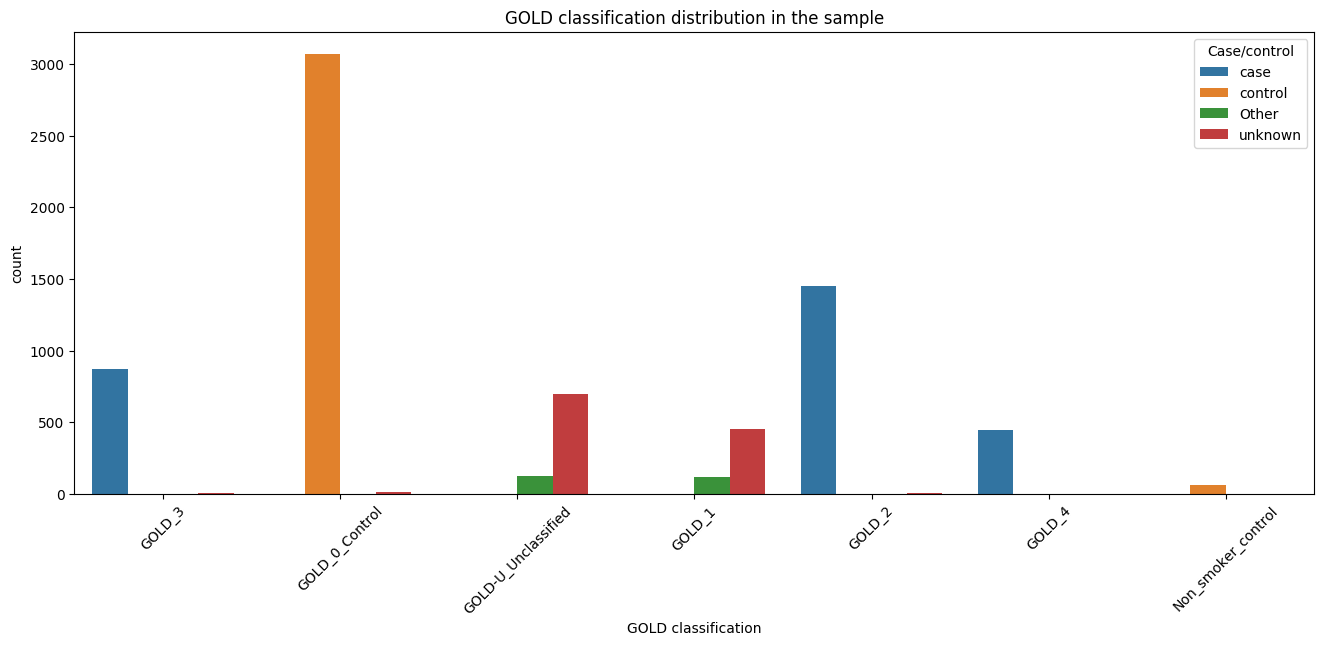

In [106]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd, hue = "Case/control")
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [107]:
unknown = copd.loc[copd['Case/control'] == 'unknown']

In [108]:
unkwn = unknown['GOLD classification'].value_counts()
unkwn

GOLD-U_Unclassified    694
GOLD_1                 454
GOLD_0_Control          16
GOLD_2                   9
GOLD_3                   8
GOLD_4                   1
Name: GOLD classification, dtype: int64

In [109]:
#Drop the unknown values
copd = copd[copd['Case/control'] != 'unknown']
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female
7362,chest,control,1,HMB,Yes,COPDGene_Q77372_COPDGene_Q77372,phs000179,GOLD_0_Control,CT,d1981235,Caucasian,male
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [110]:
#GOLD 0 is controls which means that subjects do not have COPD. Locate subjects that have GOLD 0. Remove controls and unclassified 
copd.loc[copd['GOLD classification'] == 'GOLD_0_Control']

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
9,chest,control,1,HMB,Yes,COPDGene_A02050_COPDGene_A02050,phs000179,GOLD_0_Control,CT,d1976718,African American,female
10,chest,control,1,HMB,Yes,COPDGene_A02098,phs000179,GOLD_0_Control,CT,d1990706,African,female
...,...,...,...,...,...,...,...,...,...,...,...,...
7358,chest,control,1,HMB,Yes,COPDGene_Q77225_COPDGene_Q77225,phs000179,GOLD_0_Control,CT,d1981234,Caucasian,male
7359,chest,control,1,HMB,Yes,COPDGene_Q77279_COPDGene_Q77279,phs000179,GOLD_0_Control,CT,d1982385,Caucasian,female
7360,chest,control,1,HMB,Yes,COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1992315,Caucasian,female
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female


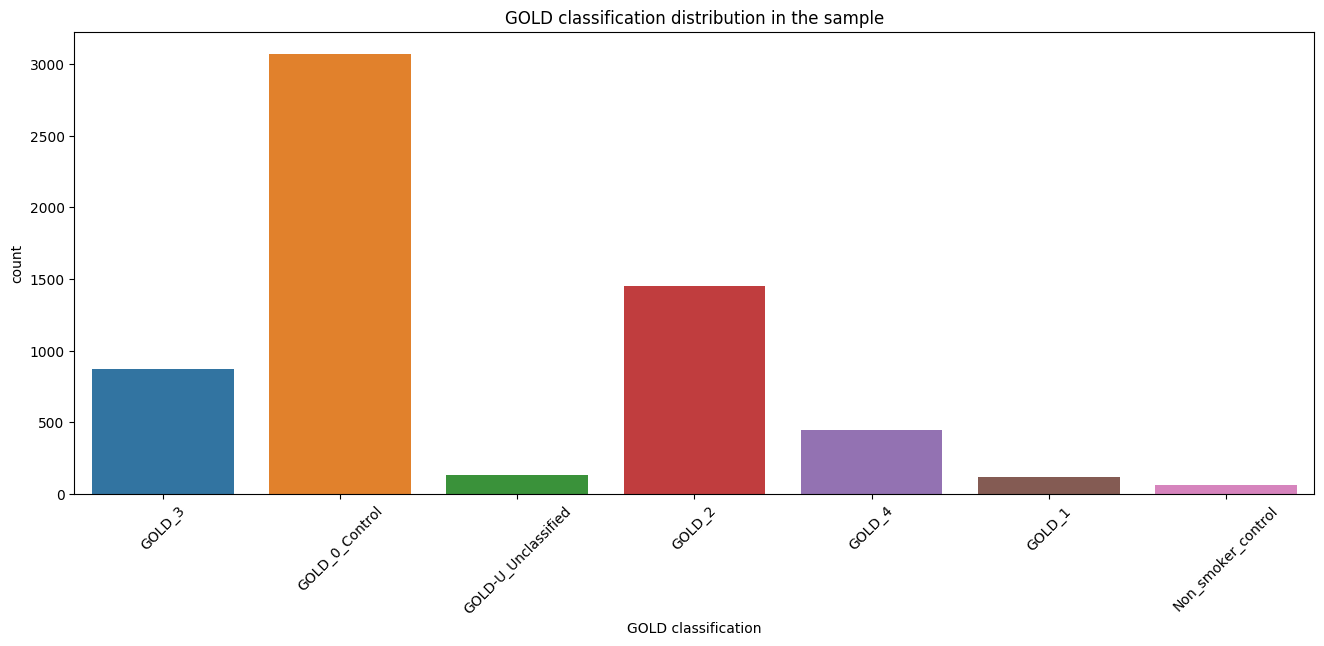

In [111]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [112]:
#Drop the controls
copd = copd[copd['GOLD classification'] != 'GOLD_0_Control']
copd = copd[copd['GOLD classification'] != 'GOLD_U_Unclassified']
copd = copd[copd['GOLD classification'] != 'GOLD_1']
copd = copd[copd['GOLD classification'] != 'Non_smoker_control']
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
5,chest,Other,1,HMB,Yes,COPDGene_A01052,phs000179,GOLD-U_Unclassified,CT,d1992493,Caucasian,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
16,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


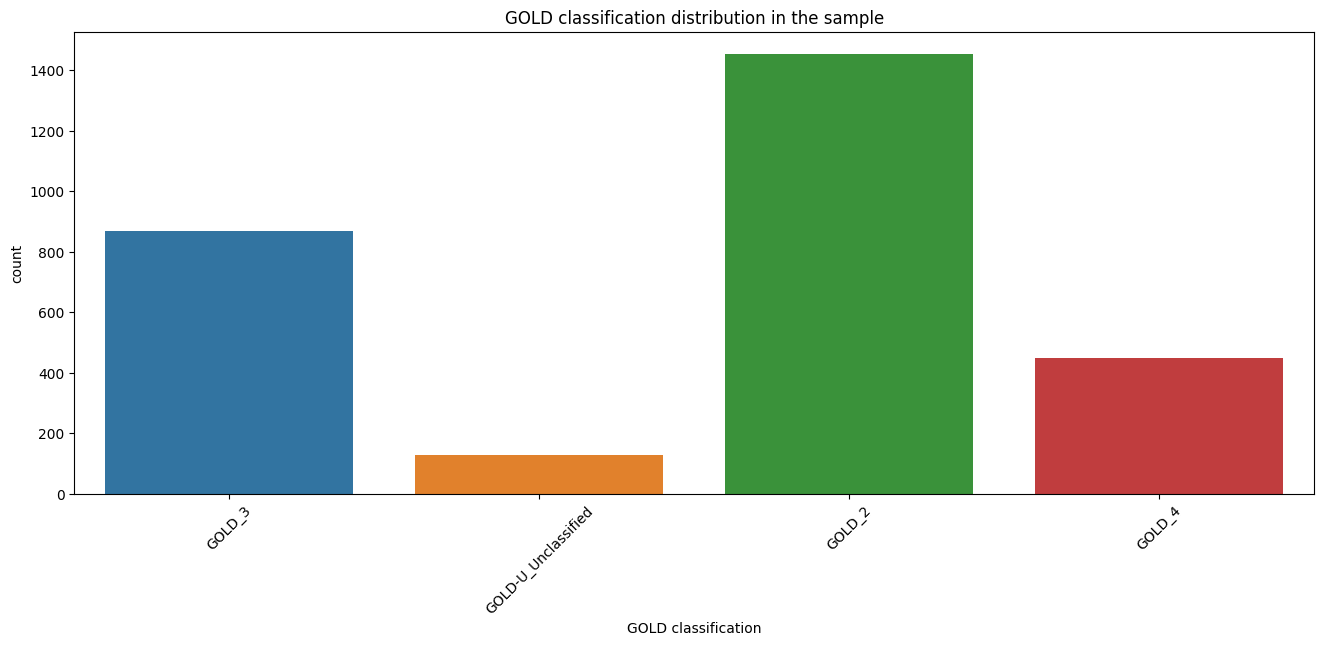

In [113]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [114]:
#Drop the unknown values
copd = copd[copd['Case/control'] != 'Other']
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
16,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
17,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [115]:
copd = copd[copd['Case/control'] != 'control']
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
16,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
17,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


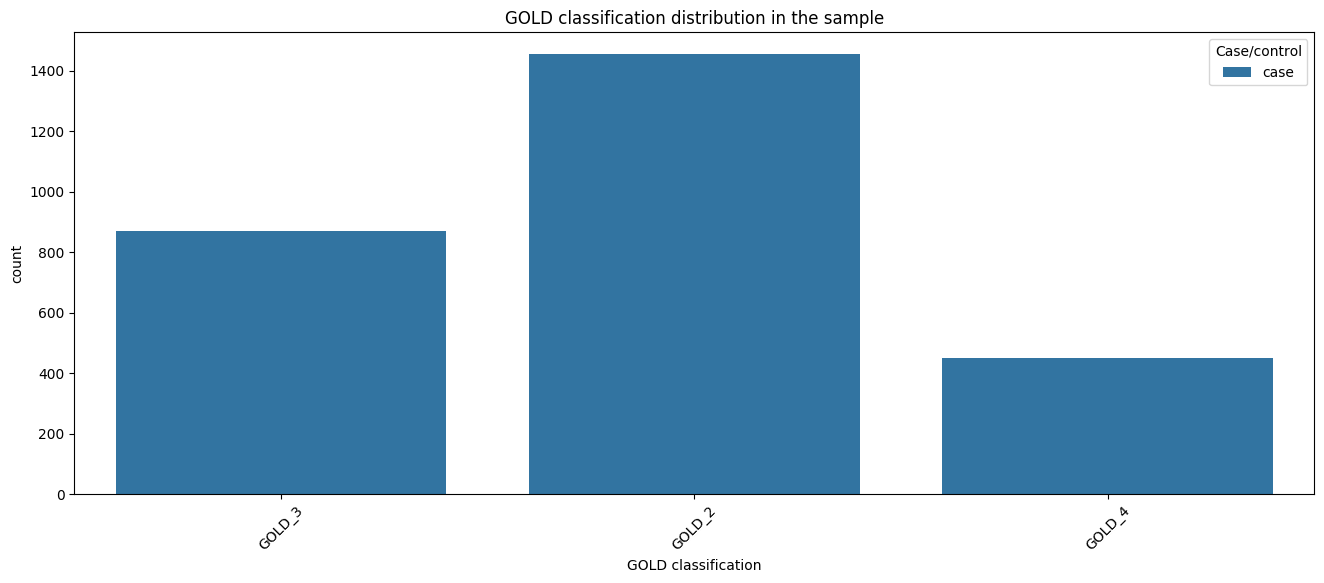

In [116]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd, hue='Case/control')
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [117]:
copd.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/COPD_gene_COPDsubjects.csv", index=False) #saving ths clean classifications

## Dataset for SPIE: Spreadsheet obtained from prepCOPDgenedataSPIE.py under the make_data folder. function that was run was curate_copd_data_SPIE()

In [118]:
copd_gold = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data.csv") #File with the inspiratory expiratory file paths 
copd_gold

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,EXPIRATORY-TIGHT DFOV,GE MEDICAL SYSTEMS
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,SOFT TISS. RECONS,GE MEDICAL SYSTEMS
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,SOFT TISS. RECONS,GE MEDICAL SYSTEMS
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,INSPIRATORY-TIGHT DFOV,GE MEDICAL SYSTEMS
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_INSP_STD,GE MEDICAL SYSTEMS
...,...,...,...,...,...
11632,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q77609,B31f,COPDGene_Q77609_EXP_STD,SIEMENS
11633,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q78049,B31f,COPDGene_Q78049_EXP_STD,SIEMENS
11634,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q78049,B45f,COPDGene_Q78049_EXP_SHARP,SIEMENS
11635,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q78049,B31f,COPDGene_Q78049_INSP_STD,SIEMENS


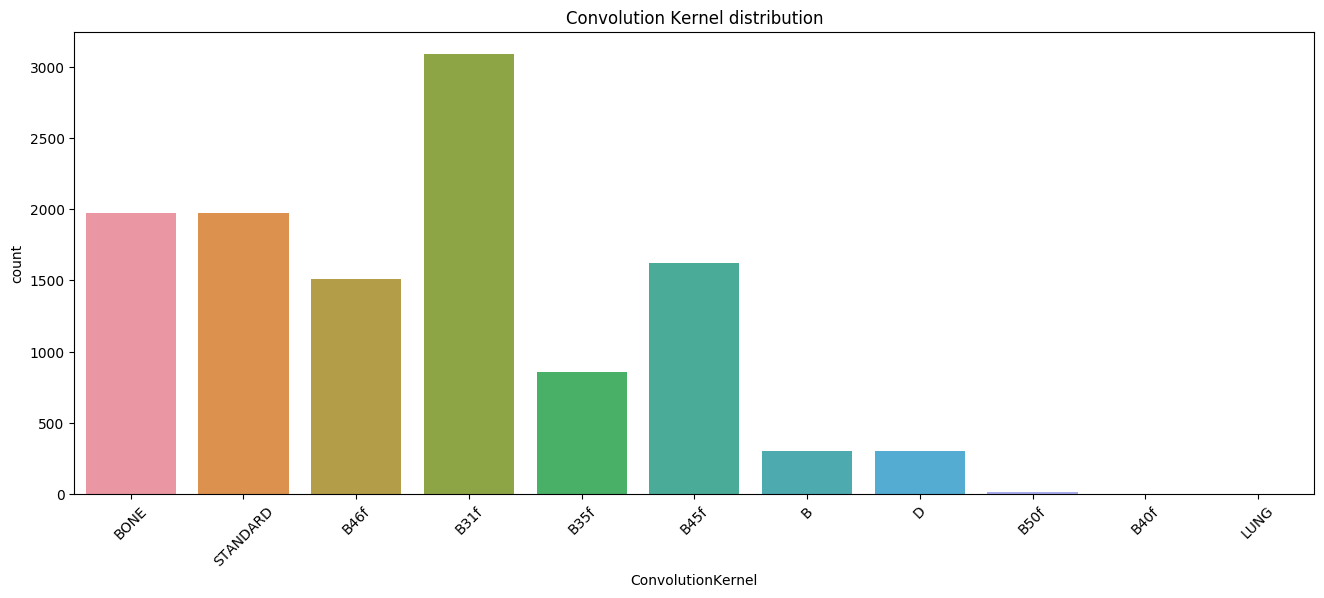

In [119]:
#Make a plot of Convolution kernels versus Series Description
plt.figure(figsize=(16,6))
sns.countplot(x='ConvolutionKernel', data=copd_gold)
plt.title('Convolution Kernel distribution')
plt.xticks(rotation=45)
plt.show()

In [120]:
#Keep the kernels that are BONE and STANDARD and remove the rest
copd_bone_standard = copd_gold[copd_gold['ConvolutionKernel'].isin(['BONE', 'STANDARD'])]
copd_bone_standard

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,EXPIRATORY-TIGHT DFOV,GE MEDICAL SYSTEMS
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,SOFT TISS. RECONS,GE MEDICAL SYSTEMS
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,SOFT TISS. RECONS,GE MEDICAL SYSTEMS
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,INSPIRATORY-TIGHT DFOV,GE MEDICAL SYSTEMS
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_INSP_STD,GE MEDICAL SYSTEMS
...,...,...,...,...,...
11590,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_EXP_SHARP,GE MEDICAL SYSTEMS
11599,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS
11600,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,STANDARD,COPDGene_Q73716_INSP_STD,GE MEDICAL SYSTEMS
11601,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_EXP_SHARP,GE MEDICAL SYSTEMS


In [121]:
copd_bone_standard.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data_GEkernels.csv", index=False) #Save the dataframe with the GE kernels

## Dataset curation after running prepCOPDgeneratedataSPIE.py (function is get_inspiratory_expiratory_GEkernels())

In [ ]:
copd_bone_standard = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_GOLD_GEkernels_matched.csv")
copd_bone_standard


In [ ]:
#Filter dataframe to include Inspiratory and Expiratory scans where the values are INSP_SHARP and EXP_STD. 
#this is done to find the inspiratory/expiratory scan which is preent in the filename itself for the available scans
copd_bone_standard = copd_bone_standard[copd_bone_standard['Inspiration_Expiration'].isin(['INSP_SHARP', 'EXP_STD'])]
copd_bone_standard

In [124]:
grouped = copd_bone_standard.groupby('PatientID')
grouped

In [125]:
filtered = grouped.filter(lambda x: all(scan in x['Inspiration_Expiration'].values for scan in ['INSP_SHARP', 'EXP_STD']))


In [126]:
filtered 

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
7,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
10,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,BONE,COPDGene_A05113_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
12,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,STANDARD,COPDGene_A05113_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
15,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A08860,BONE,COPDGene_A08860_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
...,...,...,...,...,...,...
3937,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,BONE,COPDGene_Q70095_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
3939,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,STANDARD,COPDGene_Q72811_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
3941,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
3943,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [127]:
filtered.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv", index=False)

In [128]:
copd_insp_exp = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv")
copd_insp_exp

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,BONE,COPDGene_A05113_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,STANDARD,COPDGene_A05113_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A08860,BONE,COPDGene_A08860_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
...,...,...,...,...,...,...
1505,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,BONE,COPDGene_Q70095_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1506,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,STANDARD,COPDGene_Q72811_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
1507,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1508,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [139]:
#Combine PatientID and Inspiration_Expiration to create a new column saying PatientID_Inspiration_Expiration
copd_insp_exp['PatientID_Inspiration_Expiration'] = copd_insp_exp['PatientID'] + '_' + copd_insp_exp['ConvolutionKernel']
copd_insp_exp

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A00282_BONE
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A00282_STANDARD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,BONE,COPDGene_A05113_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A05113_BONE
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,STANDARD,COPDGene_A05113_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A05113_STANDARD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A08860,BONE,COPDGene_A08860_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A08860_BONE
...,...,...,...,...,...,...,...
1505,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,BONE,COPDGene_Q70095_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q70095_BONE
1506,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,STANDARD,COPDGene_Q72811_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q72811_STANDARD
1507,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q72811_BONE
1508,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q73716_BONE


In [140]:
#Combining patientID and ConvolutionKernel to create a new column. For the purpose of symlinking
unique_patients = copd_insp_exp['PatientID'].unique()

# Randomly sample 100 patients
sampled_patients = pd.Series(unique_patients).sample(100, random_state=1)

# Filter the DataFrame to only include the sampled patients
sampled_df = copd_insp_exp[copd_insp_exp['PatientID'].isin(sampled_patients)]
sampled_df

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
16,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A16009_BONE
17,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A16009_STANDARD
32,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A24802_STANDARD
33,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A24802_BONE
38,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A27373,BONE,COPDGene_A27373_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A27373_BONE
...,...,...,...,...,...,...,...
1473,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q42739,BONE,COPDGene_Q42739_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q42739_BONE
1486,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q53485,STANDARD,COPDGene_Q53485_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q53485_STANDARD
1487,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q53485,BONE,COPDGene_Q53485_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q53485_BONE
1488,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q53566,BONE,COPDGene_Q53566_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q53566_BONE


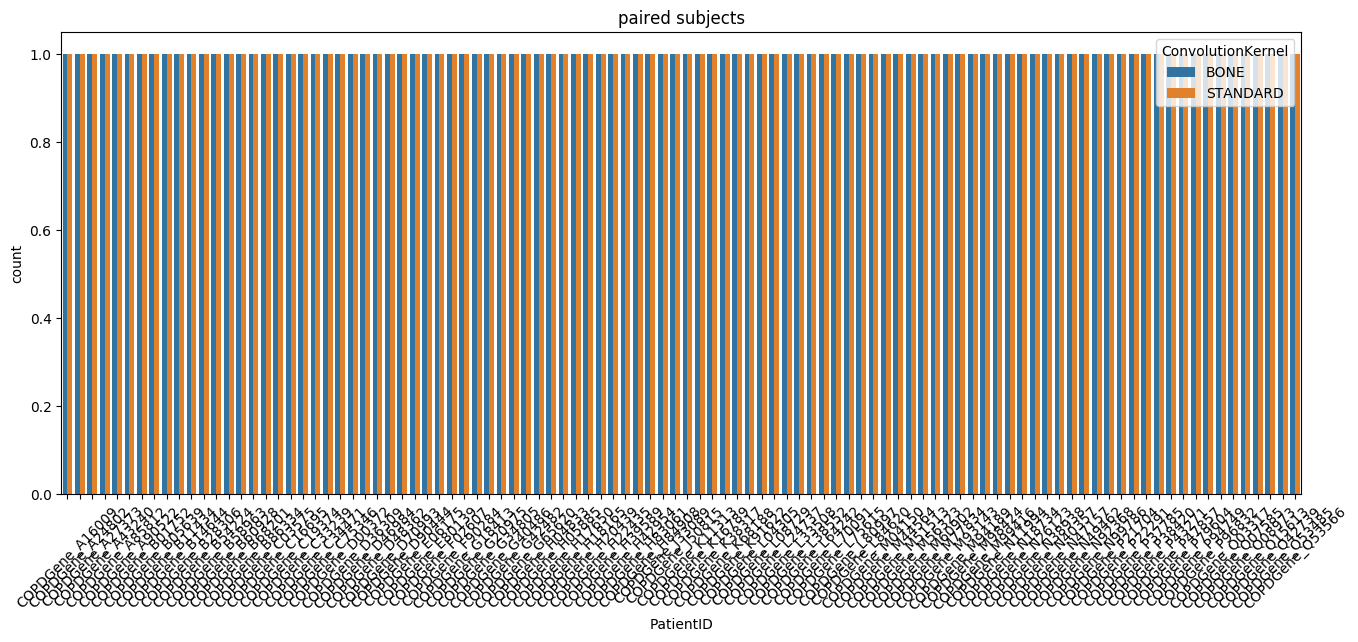

In [141]:
plt.figure(figsize=(16,6))
sns.countplot(x='PatientID', data=sampled_df, hue='ConvolutionKernel')
plt.title('paired subjects')
plt.xticks(rotation=45)
plt.show()

In [143]:
#Using the sampled patients, symlink the DICOM files to a new directory
#Create a new directory to store the DICOM files
os.makedirs("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data", exist_ok=True)

for index, row in sampled_df.iterrows():
    patient_id_inspiration_expiration = row['PatientID_Inspiration_Expiration']
    src = row['File_Path']
    dest = f"/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data/{patient_id_inspiration_expiration}"
    
    os.symlink(src, dest)
